In [1]:
!pip install tensorflow

You should consider upgrading via the '/home/hassen/pycharm-download/project/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pillow Cython lxml jupyter matplotlib

You should consider upgrading via the '/home/hassen/pycharm-download/project/bin/python -m pip install --upgrade pip' command.


In [3]:
import os

In [4]:
MODEL_PATH = os.path.join(os.getcwd(), 'models') # Path to models

In [5]:
MODEL_PATH

'/home/hassen/project/models'

In [6]:
if not os.path.exists(MODEL_PATH): # If models folder does not exist
    !mkdir {MODEL_PATH} # Create models folder

In [13]:
 import getpass
# Install Tensorflow Object Detection
if os.name=='posix': # if the operating system is linux
    password =getpass.getpass() # get the password
    command = "sudo -S apt-get install protobuf-compiler python-lxml python-pil"
    os.system('echo %s| %s' % (password, command)) # install protobuf compiler
    !cd models/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .  # install the object detection api

[sudo] password for hassen: 

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.6.1.3-2ubuntu5).
The following packages were automatically installed and are no longer required:
  mongodb-database-tools mongodb-mongosh
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  python-backports.functools-lru-cache python-bs4 python-chardet
  python-html5lib python-olefile python-pkg-resources python-six
  python-soupsieve python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-backports.functools-lru-cache python-bs4 python-chardet
  python-html5lib python-lxml python-olefile python-pil python-pkg-resources
  python-six python-soupsieve python-webencodings
0 upgraded, 11 newly installed, 0 to remove and 148 not upgraded.
Need to get 1,740 kB of archives.
After thi

In [14]:
VERIFICATION_SCRIPT = os.path.join(MODEL_PATH, 'models/research/object_detection/builders/model_builder_tf2_test.py') # Path to verification script
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-12-01 21:31:03.202378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 21:31:03.389716: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/lib
2022-12-01 21:31:03.389749: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-01 21:31:04.911952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object fil

In [3]:
ANNOTATION_PATH = os.path.join(os.getcwd(),'models', 'models' , 'annotations') # Path to annotations
XML_PATH = os.path.join(os.getcwd(),'models', 'models' , 'annotations','xmls') # Path to xml
images_path = os.path.join(os.getcwd(),'models', 'models' , 'images') # Path to images
checkpoint_path = os.path.join(os.getcwd(),'models', 'models' , 'checkpoint') # Path to checkpoint
tfrecord_path = os.path.join(os.getcwd(), 'models', 'models' , 'tfrecord') # Path to tfrecord

In [21]:
if not os.path.exists(ANNOTATION_PATH): # If annotations folder does not exist
    !mkdir {ANNOTATION_PATH} # Create annotations folder
if not os.path.exists(XML_PATH): # If xml folder does not exist
    !mkdir {XML_PATH} # Create xml folder
if not os.path.exists(images_path): # If images folder does not exist
    !mkdir {images_path} # Create images folder
if not os.path.exists(checkpoint_path): # If checkpoint folder does not exist
    !mkdir {checkpoint_path} # Create checkpoint folder
if not os.path.exists(tfrecord_path): # If tfrecord folder does not exist
    !mkdir {tfrecord_path} # Create tfrecord folder

In [66]:
#create .pbtxt file
labels = [{'id': 1, 'name': 'damage'}] # List of labels
with open(ANNOTATION_PATH + '/label_map.pbtxt', 'w') as f: # Create label map file
    for label in labels:
        f.write('item { \n')
        f.write('\t id: ' + str(label['id']) + ' \n')
        f.write('\t name: \'' + label['name'] + '\' \n')
        f.write('} \n')

In [42]:
#trainval.txt (a list of image names without file extension)
with open(ANNOTATION_PATH + '/trainval.txt', 'w') as f: # Create trainval.txt file
    for filename in os.listdir(images_path):
        #remove file extension and keep only the name
        f.write(os.path.splitext(filename)[0] + '\n')

In [43]:
#convert xmls to one csv
import csv
from pathlib import Path
from xml.etree import ElementTree as ET

directory = Path(XML_PATH) # Path to xml folder

with open(ANNOTATION_PATH + '/train_labels.csv', 'w') as f: # Create train_labels.csv file
    writer = csv.writer(f) # Create csv writer

    header = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'] # Header of csv file
    writer.writerow(header) # Write header
    xml_files_list = list(map(str, list(directory.glob('*.xml')))) # List of xml files
    for xml_file in xml_files_list: # Loop through xml files
        tree = ET.parse(xml_file) # Parse xml file
        root = tree.getroot() # Get root element
        filename = root.find('filename').text # Get filename
        width = root.find('size').find('width').text # Get width
        height = root.find('size').find('height').text # Get height
        for member in root.findall('object'): # Loop through objects
            class_name = member.find('name').text # Get class name
            xmin = member.find('bndbox').find('xmin').text # Get xmin
            ymin = member.find('bndbox').find('ymin').text # Get ymin
            xmax = member.find('bndbox').find('xmax').text # Get xmax
            ymax = member.find('bndbox').find('ymax').text # Get ymax
            row = [filename, width, height, class_name, xmin, ymin, xmax, ymax] # Create row
            writer.writerow(row) # Write row



In [44]:
#print the csv file
import pandas as pd
df = pd.read_csv(ANNOTATION_PATH + '/train_labels.csv') # Read csv file
df.head() # Show first 5 rows

,filename,width,height,class,xmin,ymin,xmax,ymax
0,46_jpg.rf.24e3ff902a4ffadeb6b31f945f5604a8.jpg,416,416,damage,175,59,289,130
1,46_jpg.rf.24e3ff902a4ffadeb6b31f945f5604a8.jpg,416,416,damage,138,177,293,272
2,46_jpg.rf.24e3ff902a4ffadeb6b31f945f5604a8.jpg,416,416,damage,88,153,157,193
3,33_jpg.rf.2e829b1f7b990c83ac3a3b233667a2f6.jpg,416,416,damage,149,52,285,153
4,33_jpg.rf.2e829b1f7b990c83ac3a3b233667a2f6.jpg,416,416,damage,264,206,416,332


# partion the dataset
run partition.py

In [1]:
!cd /home/hassen/project/Scripts && python partitions.py -x -i /home/hassen/project/models/models/images -o /home/hassen/project/models/models/images -r 0.2

partitions.py:43: DeprecationWarning: Flags not at the start of the expression '([a-zA-Z0-9\\s_\\\\.\\-\\' (truncated)
  images = [f for f in os.listdir(source) if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png)$', f)] # get all images


# Create TFRecord
TFRecord is an important data format designed for Tensorflow. Before you can train your custom object detector, you must convert your data into the TFRecord format.

Since we need to train as well as validate our model, the data set will be split into training (train.record) and validation sets (val.record). The purpose of training set is straight forward - it is the set of examples the model learns from. The validation set is a set of examples used DURING TRAINING to iteratively assess model accuracy.
We’re going to use create_tf_record.py to convert our data set into train.record and val.record. Download here and save it to models/research/object_detection/dataset_tools/.

In [29]:
#convert xml to csv from images\train
import xml.etree.ElementTree as ET
import csv
import os
import glob
directory = os.path.join(os.getcwd(),'models', 'models' , 'images','train') # Path to train folder

with open(ANNOTATION_PATH + '/train_labels.csv', 'w') as f: # Create train_labels.csv file
    writer = csv.writer(f) # Create csv writer

    header = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'] # Header of csv file
    writer.writerow(header) # Write header
    for xml_file in glob.glob(directory + '/*.xml'): # Loop through xml files
        tree = ET.parse(xml_file) # Parse xml file
        root = tree.getroot() # Get root element
        filename = root.find('filename').text # Get filename
        width = root.find('size').find('width').text # Get width
        height = root.find('size').find('height').text # Get height
        for member in root.findall('object'): # Loop through objects
            class_name = member.find('name').text # Get class name
            xmin = member.find('bndbox').find('xmin').text # Get xmin
            ymin = member.find('bndbox').find('ymin').text # Get ymin
            xmax = member.find('bndbox').find('xmax').text # Get xmax
            ymax = member.find('bndbox').find('ymax').text # Get ymax
            row = [filename, width, height, class_name, xmin, ymin, xmax, ymax] # Create row
            writer.writerow(row) # Write row

In [30]:
import pandas as pd
df = pd.read_csv(ANNOTATION_PATH + '/train_labels.csv') # Read csv file
df# Show first 5 rows

,filename,width,height,class,xmin,ymin,xmax,ymax
0,46_jpg.rf.24e3ff902a4ffadeb6b31f945f5604a8.jpg,416,416,damage,175,59,289,130
1,46_jpg.rf.24e3ff902a4ffadeb6b31f945f5604a8.jpg,416,416,damage,138,177,293,272
2,46_jpg.rf.24e3ff902a4ffadeb6b31f945f5604a8.jpg,416,416,damage,88,153,157,193
3,33_jpg.rf.2e829b1f7b990c83ac3a3b233667a2f6.jpg,416,416,damage,149,52,285,153
4,33_jpg.rf.2e829b1f7b990c83ac3a3b233667a2f6.jpg,416,416,damage,264,206,416,332
...,...,...,...,...,...,...,...,...
88,58_jpg.rf.fb01338767bb009a9b4a864238a52e79.jpg,416,416,damage,9,2,182,177
89,13_jpg.rf.2a3cf5391b524357cba1f95b7e72f98c.jpg,416,416,damage,151,72,253,239
90,3_jpg.rf.bfa03b1964e0c28a331c9677f74963ee.jpg,416,416,damage,99,200,165,247
91,49_jpg.rf.8be714a5fe31c507e84ce7b6267fdabc.jpg,416,416,damage,118,202,221,283


In [27]:
#convert xml to csv from images\test
directory = os.path.join(os.getcwd(),'models', 'models' , 'images','test') # Path to test folder

with open(ANNOTATION_PATH + '/train_labels.csv', 'w') as f: # Create train_labels.csv file
    writer = csv.writer(f) # Create csv writer

    header = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'] # Header of csv file
    writer.writerow(header) # Write header
    for xml_file in glob.glob(directory + '/*.xml'): # Loop through xml files
        tree = ET.parse(xml_file) # Parse xml file
        root = tree.getroot() # Get root element
        filename = root.find('filename').text # Get filename
        width = root.find('size').find('width').text # Get width
        height = root.find('size').find('height').text # Get height
        for member in root.findall('object'): # Loop through objects
            class_name = member.find('name').text # Get class name
            xmin = member.find('bndbox').find('xmin').text # Get xmin
            ymin = member.find('bndbox').find('ymin').text # Get ymin
            xmax = member.find('bndbox').find('xmax').text # Get xmax
            ymax = member.find('bndbox').find('ymax').text # Get ymax
            row = [filename, width, height, class_name, xmin, ymin, xmax, ymax] # Create row
            writer.writerow(row) # Write row

In [28]:
df1 = pd.read_csv(ANNOTATION_PATH + '/train_labels.csv') # Read csv file
df1

,filename,width,height,class,xmin,ymin,xmax,ymax
0,26_jpg.rf.5b5fbd42ffc6d9284403cdcc0e4eed0e.jpg,416,416,damage,90,52,377,398
1,50_jpg.rf.2c57676ff1b4248ab89652128411bb5c.jpg,416,416,damage,73,62,336,206
2,50_jpg.rf.2c57676ff1b4248ab89652128411bb5c.jpg,416,416,damage,178,208,354,266
3,50_jpg.rf.2c57676ff1b4248ab89652128411bb5c.jpg,416,416,damage,300,166,347,209
4,50_jpg.rf.2c57676ff1b4248ab89652128411bb5c.jpg,416,416,damage,102,202,179,253
5,69_jpg.rf.fc9c6a44708dc0eceaa1d5454c79735e.jpg,416,416,damage,186,257,251,320
6,71_jpg.rf.4099144e3195221a13386d39edc7fda4.jpg,416,416,damage,288,201,376,300
7,71_jpg.rf.4099144e3195221a13386d39edc7fda4.jpg,416,416,damage,3,60,103,144
8,62_jpg.rf.ff046698aab468ca4baea3d28a1fcbb9.jpg,416,416,damage,90,296,221,411
9,10_jpg.rf.e4c70ba4c6d3a36b0ae6300b5843be2a.jpg,416,416,damage,81,85,172,199


In [32]:
#execute the tfrecord scripts
# Create train data:
!cd /home/hassen/project/Scripts &&  python TFRecord.py -x /home/hassen/project/models/models/images/train -l /home/hassen/project/models/models/annotations/label_map.pbtxt -o /home/hassen/project/models/models/annotations/train.record -c /home/hassen/project/models/models/annotations/train_labels.csv


2022-12-03 17:06:13.174848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 17:06:13.333162: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/lib
2022-12-03 17:06:13.333183: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 17:06:14.286860: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object fil

In [33]:
# Create test data:
!cd /home/hassen/project/Scripts &&  python TFRecord.py -x /home/hassen/project/models/models/images/test -l /home/hassen/project/models/models/annotations/label_map.pbtxt -o /home/hassen/project/models/models/annotations/test.record -c /home/hassen/project/models/models/annotations/test_labels.csv

2022-12-03 17:06:16.633477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 17:06:16.767167: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/lib
2022-12-03 17:06:16.767206: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 17:06:17.451092: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object fil

# Download the pre-trained model


In [50]:
pretrained_model_url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
pretrained_model_name = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
pretrained_model_path = os.path.join(os.getcwd(),'models', 'models' , 'pre-trained_model')

In [51]:
pretrained_model_path

'/home/hassen/project/models/models/pre-trained_model'

In [52]:
if not os.path.exists(pretrained_model_path):
    os.makedirs(pretrained_model_path)

In [54]:
!wget {pretrained_model_url} -O {pretrained_model_path}/{pretrained_model_name}.tar.gz
!cd {pretrained_model_path} && tar -xvf {pretrained_model_name+'.tar.gz'}

--2022-12-03 17:52:42--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.76.128, 2a00:1450:400c:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.76.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘/home/hassen/project/models/models/pre-trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

/home/hassen/projec 100%[===================>]  19.56M  3.42MB/s    in 5.6s    

2022-12-03 17:52:48 (3.50 MB/s) - ‘/home/hassen/project/models/models/pre-trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mo

In [37]:
# Extract model
!tar -zxvf /home/hassen/project/models/models/checkpoint/{model_file} -C /home/hassen/project/models/models/checkpoint

ssd_mobilenet_v2_320x320_coco17_tpu-8/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [57]:
#copy the pipeline.config file to the models folder
!cp /home/hassen/project/models/models/pre-trained_model/{pretrained_model_name}/pipeline.config /home/hassen/project/models/models/checkpoint
print('pipeline.config file copied to checkpoint folder')

pipeline.config file copied to checkpoint folder


In [59]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2022-12-03 17:59:56.298672: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 17:59:56.620000: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/lib
2022-12-03 17:59:56.620039: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 17:59:58.258361: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object fil

In [60]:
config = config_util.get_configs_from_pipeline_file('/home/hassen/project/models/models/checkpoint/pipeline.config') # Get pipeline config

In [61]:
config # Show pipeline config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [67]:
# Update pipeline config
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig() # Create pipeline config
with tf.io.gfile.GFile('/home/hassen/project/models/models/checkpoint/pipeline.config', "r") as f: # Open pipeline config file
    proto_str = f.read() # Read file
    text_format.Merge(proto_str, pipeline_config) # Merge file

In [69]:
pipeline_config.model.ssd.num_classes = len(labels) # Set number of classes
pipeline_config.train_config.batch_size = 4 # Set batch size
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(os.getcwd(),'models', 'models' , 'pre-trained_model', pretrained_model_name, 'checkpoint', 'ckpt-0') # Set fine tune checkpoint
pipeline_config.train_config.fine_tune_checkpoint_type = "detection" # Set fine tune checkpoint type
pipeline_config.train_input_reader.label_map_path= os.path.join(os.getcwd(),'models', 'models' , 'annotations', 'label_map.pbtxt') # Set label map path
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(os.getcwd(),'models', 'models' , 'annotations', 'train.record')] # Set train record path
pipeline_config.eval_input_reader[0].label_map_path = os.path.join(os.getcwd(),'models', 'models' , 'annotations', 'label_map.pbtxt') # Set label map path
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(os.getcwd(),'models', 'models' , 'annotations', 'test.record')] # Set test record path

In [70]:
config_text = text_format.MessageToString(pipeline_config) # Convert pipeline config to string
with tf.io.gfile.GFile('/home/hassen/project/models/models/checkpoint/pipeline.config', "wb") as f: # Open pipeline config file
    f.write(config_text) # Write config text to file

# Train the model

In [71]:
training_script_path = os.path.join(os.getcwd(),'models', 'models' , 'research', 'object_detection', 'model_main_tf2.py') # Get training

In [76]:
command = 'python {} --model_dir={} --pipeline_config_path={} --num_train_steps=1000'.format(training_script_path, '/home/hassen/project/models/models/checkpoint', '/home/hassen/project/models/models/checkpoint/pipeline.config') # Create training command

In [77]:
command

'python /home/hassen/project/models/models/research/object_detection/model_main_tf2.py --model_dir=/home/hassen/project/models/models/checkpoint --pipeline_config_path=/home/hassen/project/models/models/checkpoint/pipeline.config --num_train_steps=1000'

In [78]:
# Execute training command
!{command}

2022-12-03 18:32:35.517077: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 18:32:37.897782: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/lib
2022-12-03 18:32:37.897868: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 18:32:47.673141: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object fil

In [ ]:
#in case the command above returns an error
!pip install "opencv-python-headless<4.3"

# evaluate the model

In [79]:
command = 'python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}'.format(training_script_path, '/home/hassen/project/models/models/checkpoint', '/home/hassen/project/models/models/checkpoint/pipeline.config', '/home/hassen/project/models/models/checkpoint') # Create training command

In [80]:
command

'python /home/hassen/project/models/models/research/object_detection/model_main_tf2.py --model_dir=/home/hassen/project/models/models/checkpoint --pipeline_config_path=/home/hassen/project/models/models/checkpoint/pipeline.config --checkpoint_dir=/home/hassen/project/models/models/checkpoint'

In [81]:
# Execute training command
!{command}

2022-12-03 18:47:12.205223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 18:47:12.362150: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/lib
2022-12-03 18:47:12.362172: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 18:47:13.341959: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object fil

In [82]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

/home/hassen/pycharm-download/project/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [103]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file('/home/hassen/project/models/models/checkpoint/pipeline.config')
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join('/home/hassen/project/models/models/checkpoint', 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections

In [104]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [105]:
category_index = label_map_util.create_category_index_from_labelmap('/home/hassen/project/models/models/annotations/label_map.pbtxt')

In [106]:
image_path = os.path.join(os.getcwd(),'models', 'models' ,'images', 'test', '2_jpg.rf.6e8748f602337794fdb2a55436449ac5.jpg')

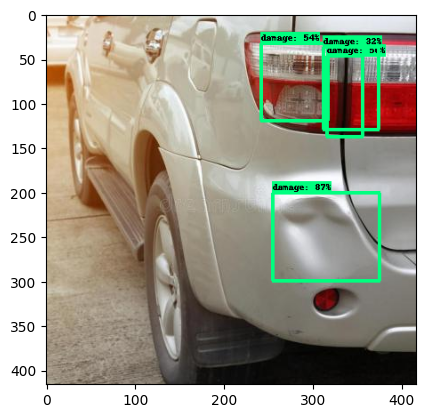

In [107]:
img = cv2.imread(image_path)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections= detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes']+label_id_offset,
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()